In [2]:
DATASET = {
    "Name": ['Karuna', 'Bhuvna', 'gaurav', 'Parul', "Dinesh", 'Jani', 'Bobby', 'Parimal', 'Govind', 'Susant', 'Gouri', 'Bharat', 'Ravi', 'Predeep', 'Josh'],
    'Aptitude': [2, 2, 7, 7, 8, 4, 5, 3, 8, 6, 6, 6, 6, 9, 2],
    'Communication': [5, 6, 6, 2.5, 6, 7, 3, 5.5, 3, 5.5, 4, 7, 2, 7, 4.5],
    "Class": ["Speaker", "Speaker", "Leader", "Intel", "Leader", "Speaker", "Intel", "Speaker", "Intel", "Leader", "Intel", "Leader", "Intel", "Leader", "Intel"]
}



### Importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay
# from sklearn.metrics import 

In [4]:
df = pd.DataFrame(DATASET)
df

,Name,Aptitude,Communication,Class
0,Karuna,2,5.0,Speaker
1,Bhuvna,2,6.0,Speaker
2,gaurav,7,6.0,Leader
3,Parul,7,2.5,Intel
4,Dinesh,8,6.0,Leader
5,Jani,4,7.0,Speaker
6,Bobby,5,3.0,Intel
7,Parimal,3,5.5,Speaker
8,Govind,8,3.0,Intel
9,Susant,6,5.5,Leader


### Preprocessing

Removing unwanted features.

In [5]:
df_filtered = df.drop(['Name'], axis=1)
df_filtered

,Aptitude,Communication,Class
0,2,5.0,Speaker
1,2,6.0,Speaker
2,7,6.0,Leader
3,7,2.5,Intel
4,8,6.0,Leader
5,4,7.0,Speaker
6,5,3.0,Intel
7,3,5.5,Speaker
8,8,3.0,Intel
9,6,5.5,Leader


Converting categorial features to numerical features.

In [6]:
oe = OrdinalEncoder()
transform_class = oe.fit_transform(df_filtered.select_dtypes(include="object").values.tolist())
transform_class


array([[2.],
       [2.],
       [1.],
       [0.],
       [1.],
       [2.],
       [0.],
       [2.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]])

In [7]:
df_filtered['Class'] = transform_class
df_filtered

,Aptitude,Communication,Class
0,2,5.0,2.0
1,2,6.0,2.0
2,7,6.0,1.0
3,7,2.5,0.0
4,8,6.0,1.0
5,4,7.0,2.0
6,5,3.0,0.0
7,3,5.5,2.0
8,8,3.0,0.0
9,6,5.5,1.0


### Modeling

Filtering feature X (predictor variables) and y (target feature)

In [8]:
X = df_filtered[['Aptitude', 'Communication']]
y = df_filtered['Class']
X, y

(    Aptitude  Communication
 0          2            5.0
 1          2            6.0
 2          7            6.0
 3          7            2.5
 4          8            6.0
 5          4            7.0
 6          5            3.0
 7          3            5.5
 8          8            3.0
 9          6            5.5
 10         6            4.0
 11         6            7.0
 12         6            2.0
 13         9            7.0
 14         2            4.5,
 0     2.0
 1     2.0
 2     1.0
 3     0.0
 4     1.0
 5     2.0
 6     0.0
 7     2.0
 8     0.0
 9     1.0
 10    0.0
 11    1.0
 12    0.0
 13    1.0
 14    0.0
 Name: Class, dtype: float64)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

Fitting the data into the models

In [10]:
knn = KNeighborsClassifier()

In [11]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
predicted = knn.predict(X_test)
predicted

array([0., 2.])

In [13]:
oe.inverse_transform(predicted.reshape((2, 1)))


array([['Intel'],
       ['Speaker']], dtype=object)

[<matplotlib.lines.Line2D object at 0x0000025C66497C50>, <matplotlib.lines.Line2D object at 0x0000025C69A94140>, <matplotlib.lines.Line2D object at 0x0000025C6A59EEA0>]
[<matplotlib.lines.Line2D object at 0x0000025C66114140>, <matplotlib.lines.Line2D object at 0x0000025C664844D0>, <matplotlib.lines.Line2D object at 0x0000025C69ABC5F0>]


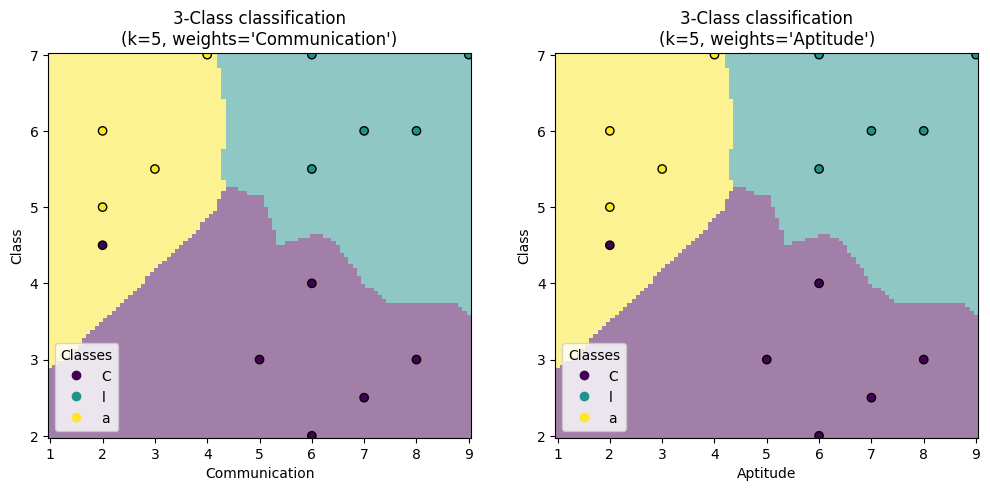

In [37]:
predictors = ['Communication', 'Aptitude']
target = 'Class'

_, axs = plt.subplots(ncols=2, figsize=(12, 5))

knn2 = KNeighborsClassifier()

for ax, weights in zip(axs, predictors):
    knn2.fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        knn,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=weights,
        ylabel=target,
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    print(scatter.legend_elements()[0])
    disp.ax_.legend(
        scatter.legend_elements()[0],
        target,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={knn2.n_neighbors}, weights={weights!r})"
    )

plt.show()